In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [3]:
file3 = "../output/true_div_rm_5.csv"
df3 = pd.read_csv(file3,sep=",")

In [4]:
df_box3 = df3[["num diffs","coverage","k-length","score"]]
df_box3["num diffs"] = df_box3["num diffs"]/2000000

/tmp/ipykernel_2652381/3856085377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_box3["num diffs"] = df_box3["num diffs"]/2000000


In [5]:
# df_box3 = pd.DataFrame(df, columns=["num diffs","coverage","score","k-length"])
# df_box3.boxplot(by=["coverage","k-length"])
df_box3.groupby(["coverage","k-length"]).corr()

num diffs     score
coverage k-length                               
10       10       num diffs   1.000000  0.977686
                  score       0.977686  1.000000
         20       num diffs   1.000000  0.815932
                  score       0.815932  1.000000
         30       num diffs   1.000000  0.865298
                  score       0.865298  1.000000
         40       num diffs   1.000000  0.807520
                  score       0.807520  1.000000
20       10       num diffs   1.000000  0.743108
                  score       0.743108  1.000000
         20       num diffs   1.000000  0.875308
                  score       0.875308  1.000000
         30       num diffs   1.000000  0.692796
                  score       0.692796  1.000000
         40       num diffs   1.000000  0.907426
                  score       0.907426  1.000000
30       10       num diffs   1.000000  0.856413
                  score       0.856413  1.000000
         20       num diffs   1.000000  0.880330
                  score       0.880330  1.000000
         30       num diffs   1.000000  0.862657
                  score       0.862657  1.000000
         40       num diffs   1.000000  0.890608
                  score       0.890608  1.000000
40       10       num diffs   1.000000  0.821680
                  score       0.821680  1.000000
         20       num diffs   1.000000  0.973613
                  score       0.973613  1.000000
         30       num diffs   1.000000  0.901484
                  score       0.901484  1.000000
         40       num diffs   1.000000  0.925304
                  score       0.925304  1.000000

/tmp/ipykernel_2652381/593733237.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_2652381/593733237.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_2652381/593733237.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

Coeff: 10
[5.05580655]
Coeff: 20
[10.0931901]
Coeff: 30
[17.78090744]
Coeff: 40
[15.05241018]


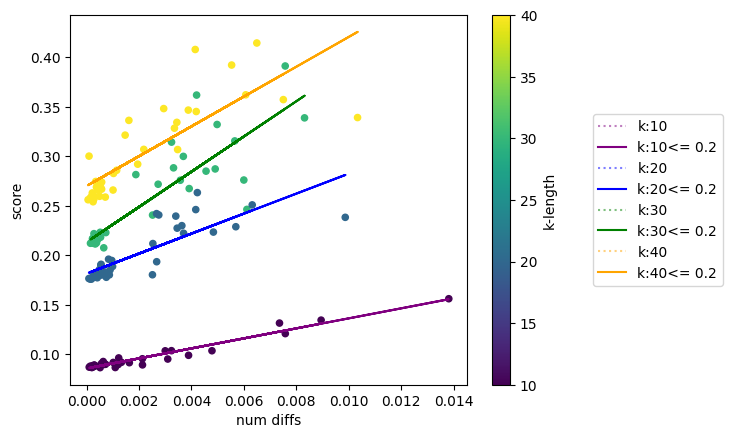

In [6]:
cov_10 = df_box3[df_box3["coverage"]==10]
# cov_10
fig, ax = plt.subplots()
cov_10.plot.scatter(y="score",x="num diffs",c="k-length",colormap='viridis',ax=ax,legend=False)

k_lengths = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(k_lengths)):
    sub_df = cov_10[cov_10["k-length"]==k_lengths[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['k:' + str(k_lengths[i])] = reg.predict(X)

    print("Coeff: " + str(k_lengths[i]))
    print(reg.coef_)

    sub_df.plot.line(y='k:' + str(k_lengths[i]),x="num diffs",ax=ax,color=color_1[i],linestyle='dotted',alpha=0.5)

    # Smaller line

    sub_df2 = sub_df[sub_df["num diffs"]<=.02]

    X = np.array(sub_df2['num diffs']).reshape(-1, 1)
    y = np.array(sub_df2['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)

    sub_df2.plot.line(y='k:' + str(k_lengths[i]) + "<= 0.2",x="num diffs",ax=ax,color=color_1[i])

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_2652381/903538148.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_2652381/903538148.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_2652381/903538148.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

Coeff: 10
[3.67194164]
Coeff: 20
[11.11647774]
Coeff: 30
[13.54469449]
Coeff: 40
[23.77094905]


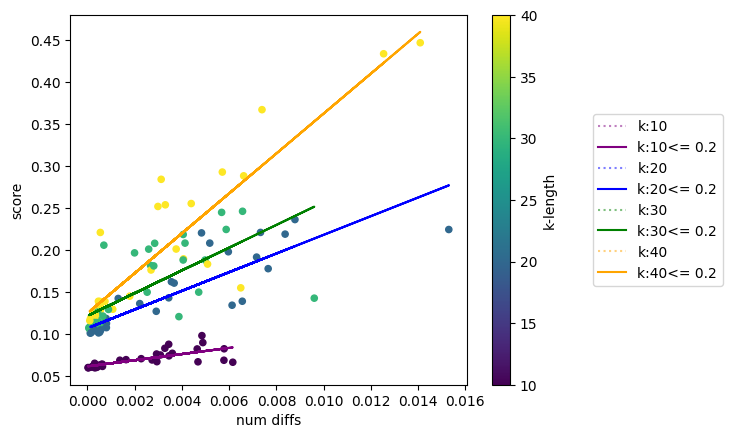

In [7]:
cov_20 = df_box3[df_box3["coverage"]==20]

# cov_20
fig, ax = plt.subplots()
cov_20.plot.scatter(y="score",x="num diffs",c="k-length",colormap='viridis',ax=ax,legend=False)

k_lengths = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(k_lengths)):
    sub_df = cov_20[cov_20["k-length"]==k_lengths[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['k:' + str(k_lengths[i])] = reg.predict(X)

    print("Coeff: " + str(k_lengths[i]))
    print(reg.coef_)

    sub_df.plot.line(y='k:' + str(k_lengths[i]),x="num diffs",ax=ax,color=color_1[i],linestyle='dotted',alpha=0.5)

    # Smaller line

    sub_df2 = sub_df[sub_df["num diffs"]<=.02]

    X = np.array(sub_df2['num diffs']).reshape(-1, 1)
    y = np.array(sub_df2['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)

    sub_df2.plot.line(y='k:' + str(k_lengths[i]) + "<= 0.2",x="num diffs",ax=ax,color=color_1[i])

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_2652381/2217191788.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_2652381/2217191788.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_2652381/2217191788.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

Coeff: 10
[4.4811789]
Coeff: 20
[12.59350663]
Coeff: 30
[19.44440089]
Coeff: 40
[17.92845804]


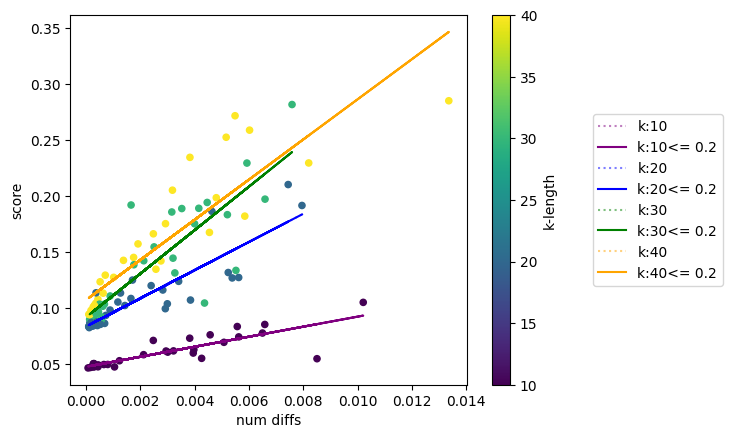

In [8]:
cov_30 = df_box3[df_box3["coverage"]==30]
# cov_10
fig, ax = plt.subplots()
cov_30.plot.scatter(y="score",x="num diffs",c="k-length",colormap='viridis',ax=ax,legend=False)

k_lengths = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(k_lengths)):
    sub_df = cov_30[cov_30["k-length"]==k_lengths[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['k:' + str(k_lengths[i])] = reg.predict(X)

    print("Coeff: " + str(k_lengths[i]))
    print(reg.coef_)

    sub_df.plot.line(y='k:' + str(k_lengths[i]),x="num diffs",ax=ax,color=color_1[i],linestyle='dotted',alpha=0.5)

    # Smaller line

    sub_df2 = sub_df[sub_df["num diffs"]<=.02]

    X = np.array(sub_df2['num diffs']).reshape(-1, 1)
    y = np.array(sub_df2['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)

    sub_df2.plot.line(y='k:' + str(k_lengths[i]) + "<= 0.2",x="num diffs",ax=ax,color=color_1[i])

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_2652381/1260264352.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_2652381/1260264352.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_2652381/1260264352.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

Coeff: 10
[4.98746211]
Coeff: 20
[16.17295175]
Coeff: 30
[20.60837918]
Coeff: 40
[29.98539935]


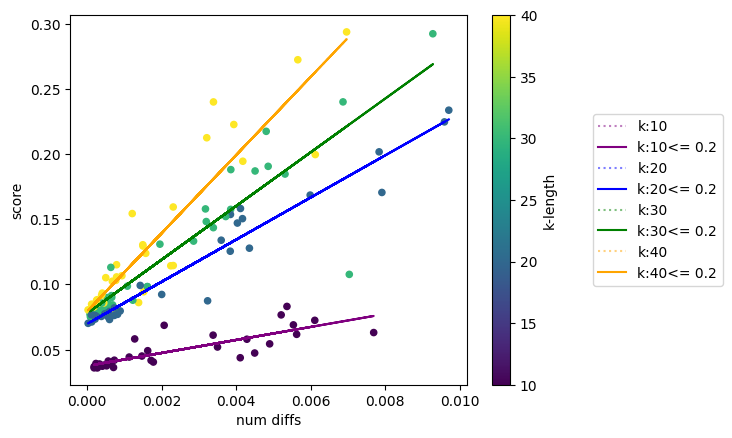

In [9]:
cov_40 = df_box3[df_box3["coverage"]==40]

# cov_10
fig, ax = plt.subplots()
cov_40.plot.scatter(y="score",x="num diffs",c="k-length",colormap='viridis',ax=ax,legend=False)

k_lengths = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(k_lengths)):
    sub_df = cov_40[cov_40["k-length"]==k_lengths[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['k:' + str(k_lengths[i])] = reg.predict(X)

    print("Coeff: " + str(k_lengths[i]))
    print(reg.coef_)

    sub_df.plot.line(y='k:' + str(k_lengths[i]),x="num diffs",ax=ax,color=color_1[i],linestyle='dotted',alpha=0.5)

    # Smaller line

    sub_df2 = sub_df[sub_df["num diffs"]<=.02]

    X = np.array(sub_df2['num diffs']).reshape(-1, 1)
    y = np.array(sub_df2['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)

    sub_df2.plot.line(y='k:' + str(k_lengths[i]) + "<= 0.2",x="num diffs",ax=ax,color=color_1[i])

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

In [12]:
klength_10 = df_box3[df_box3["k-length"]==10]
klength_10

,num diffs,coverage,k-length,score
0,0.000633,10,10,0.092771
4,0.005785,20,10,0.082284
8,0.002948,30,10,0.061459
12,0.005625,40,10,0.061752
16,0.000315,10,10,0.088451
...,...,...,...,...
546,0.004901,40,10,0.054451
550,0.000650,10,10,0.090457
554,0.000037,20,10,0.059489
558,0.000438,30,10,0.048627


/tmp/ipykernel_2652381/3764074011.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_2652381/3764074011.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_2652381/3764074011.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

Coeff: 10
[5.05580655]
Coeff: 20
[3.67194164]
Coeff: 30
[4.4811789]
Coeff: 40
[4.98746211]


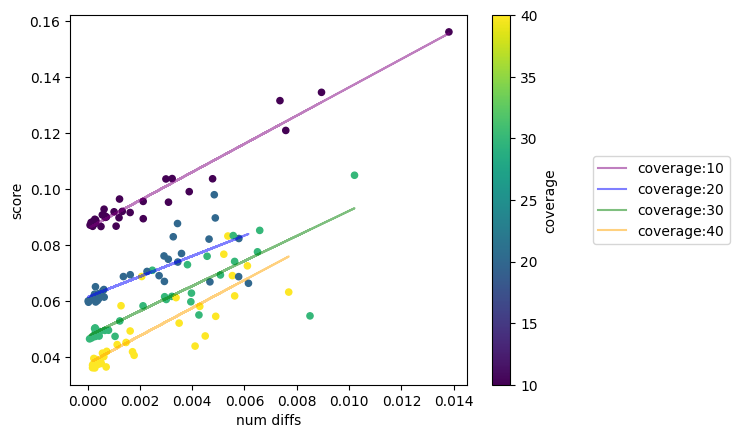

In [17]:
klength_10 = df_box3[df_box3["k-length"]==10]
# cov_10
fig, ax = plt.subplots()
klength_10.plot.scatter(y="score",x="num diffs",c="coverage",colormap='viridis',ax=ax,legend=False)

covs = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(covs)):
    sub_df = klength_10[klength_10["coverage"]==covs[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['coverage:' + str(covs[i])] = reg.predict(X)

    print("Coeff: " + str(covs[i]))
    print(reg.coef_)

    sub_df.plot.line(y='coverage:' + str(covs[i]),x="num diffs",ax=ax,color=color_1[i],alpha=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_2652381/3681623544.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_2652381/3681623544.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_2652381/3681623544.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

Coeff: 10
[10.0931901]
Coeff: 20
[11.11647774]
Coeff: 30
[12.59350663]
Coeff: 40
[16.17295175]


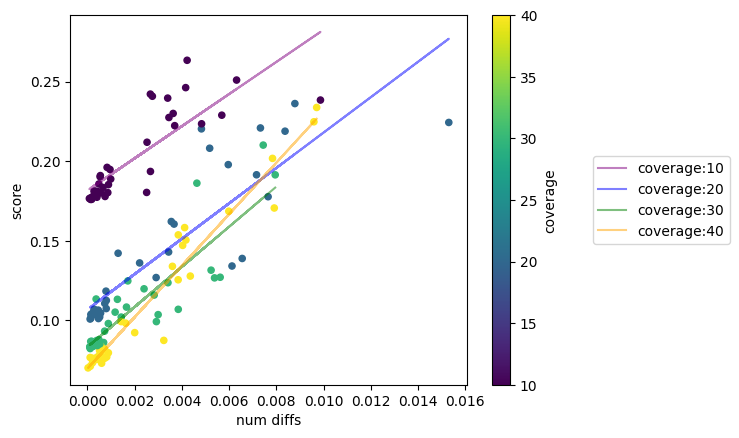

In [19]:
klength_20 = df_box3[df_box3["k-length"]==20]
# cov_10
fig, ax = plt.subplots()
klength_20.plot.scatter(y="score",x="num diffs",c="coverage",colormap='viridis',ax=ax,legend=False)

covs = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(covs)):
    sub_df = klength_20[klength_20["coverage"]==covs[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['coverage:' + str(covs[i])] = reg.predict(X)

    print("Coeff: " + str(covs[i]))
    print(reg.coef_)

    sub_df.plot.line(y='coverage:' + str(covs[i]),x="num diffs",ax=ax,color=color_1[i],alpha=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_2652381/3751330206.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_2652381/3751330206.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_2652381/3751330206.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

Coeff: 20
[13.54469449]
Coeff: 30
[19.44440089]
Coeff: 40
[20.60837918]


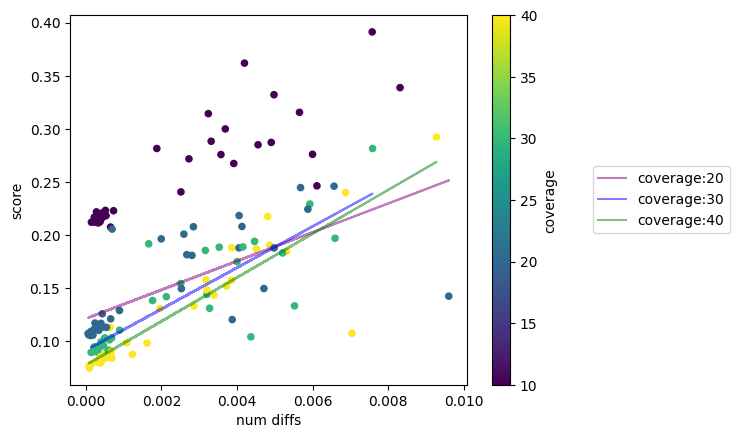

In [23]:
klength_30 = df_box3[df_box3["k-length"]==30]
# cov_10
fig, ax = plt.subplots()
klength_30.plot.scatter(y="score",x="num diffs",c="coverage",colormap='viridis',ax=ax,legend=False)

covs = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(covs)):
    sub_df = klength_30[klength_30["coverage"]==covs[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['coverage:' + str(covs[i])] = reg.predict(X)

    print("Coeff: " + str(covs[i]))
    print(reg.coef_)

    sub_df.plot.line(y='coverage:' + str(covs[i]),x="num diffs",ax=ax,color=color_1[i],alpha=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_2652381/3534754393.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_2652381/3534754393.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_2652381/3534754393.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

Coeff: 10
[15.05241018]
Coeff: 20
[23.77094905]
Coeff: 30
[17.92845804]
Coeff: 40
[29.98539935]


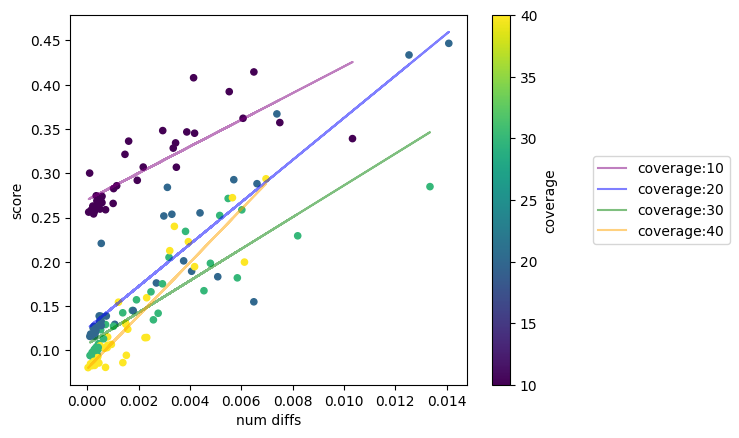

In [21]:
klength_40 = df_box3[df_box3["k-length"]==40]
# cov_10
fig, ax = plt.subplots()
klength_40.plot.scatter(y="score",x="num diffs",c="coverage",colormap='viridis',ax=ax,legend=False)

covs = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(covs)):
    sub_df = klength_40[klength_40["coverage"]==covs[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['coverage:' + str(covs[i])] = reg.predict(X)

    print("Coeff: " + str(covs[i]))
    print(reg.coef_)

    sub_df.plot.line(y='coverage:' + str(covs[i]),x="num diffs",ax=ax,color=color_1[i],alpha=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()